# Synergy between TNF-alpha and IL-17A

In [4]:
setwd(here::here())

In [5]:
source("R/002_helper_functions.R")

In [10]:
# TODO: Check out "Synergy analysis"
# https://cran.r-project.org/web/packages/BIGL/vignettes/analysis.html

library(readxl)
library(ggplot2)
library(ggbeeswarm)
# library(tidyverse)
library(data.table)
library(RColorBrewer)
library(magrittr)
library(dplyr)
library(patchwork)
library(scico)

theme_clean <- function(base_size = 20, base_family = "") {
  theme_classic(
    base_size = base_size, base_family = base_family
  ) %+replace%
    theme(
      # axis.line = element_line(size = 0.5),
      axis.ticks = element_line(size = 0.25),
      strip.background = element_rect(size = 0),
      panel.background = element_rect(size = 0.25, color = "black"),
      axis.line = element_blank()
    )
}

In [7]:
d <- read_excel("data/2011-11-14_IL6_MMP3_by_TNF_IL17_costimulation.xlsx")
x <- d[5:43,44:56]

d1 <- as.data.frame(x[2:5,], stringsAsFactors = FALSE)

d2 <- as.data.frame(x[12:15,], stringsAsFactors = FALSE)
d2[d2 == ">12000.0"] <- "12000.0"

d3 <- as.data.frame(x[23:26,], stringsAsFactors = FALSE)

d4 <- as.data.frame(x[35:38,], stringsAsFactors = FALSE)

melt_d <- function(d) {
  retval <- rbindlist(list(
    d[,c(1, 2:4)],
    d[,c(1, 5:7)],
    d[,c(1, 8:10)],
    d[,c(1, 11:13)]
  ))
  colnames(retval) <- c("TNF", "R1", "R2", "R3")
  retval$IL17 <- rep(c(0, 1, 10, 100), each = 4)
  retval$TNF <- rep(c(0, 0.1, 1, 10), 4)
  retval$R1 <- as.numeric(retval$R1)
  retval$R2 <- as.numeric(retval$R2)
  retval$R3 <- as.numeric(retval$R3)
  melt(
    data = retval,
    id.vars = c("TNF", "IL17"),
    variable.name = "rep",
    value.name = "pg_ml"
  )
}

d_il6 <- rbind(melt_d(d1), melt_d(d2))
d_il6$donor <- rep(c("RA22", "RA32"), each = 48)
d_il6$IL17_factor <- sprintf("%s ng/mL", d_il6$IL17)
d_il6$IL17_factor <- factor(d_il6$IL17_factor, c("0 ng/mL", "1 ng/mL", "10 ng/mL", "100 ng/mL"))

d_mmp3 <- rbind(melt_d(d3), melt_d(d4))
d_mmp3$donor <- rep(c("RA22", "RA32"), each = 48)
d_mmp3$IL17_factor <- sprintf("%s ng/mL", d_mmp3$IL17)
d_mmp3$IL17_factor <- factor(d_mmp3$IL17_factor, c("0 ng/mL", "1 ng/mL", "10 ng/mL", "100 ng/mL"))

il17_colors <- c(
  brewer.pal(9, "YlOrRd")[c(4, 7, 9)], brewer.pal(9, "Purples")[8]
)
# names(il17_colors) <- c("0", "1", "10", "100")
names(il17_colors) <- c("0 ng/mL", "1 ng/mL", "10 ng/mL", "100 ng/mL")


New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* … and 76 more problems
Column 2 ['...48'] of item 2 is missing in item 1. Use fill=TRUE to fill with NA (NULL for list columns), or use.names=FALSE to ignore column names. use.names='check' (default from v1.12.2) emits this message and proceeds as if use.names=FALSE for  backwards compatibility. See news item 5 in v1.12.2 for options to control this message.
Column 2 ['...48'] of item 2 is missing in item 1. Use fill=TRUE to fill with NA (NULL for list columns), or use.names=FALSE to ignore column names. use.names='check' (default from v1.12.2) emits this message and proceeds as if use.names=FALSE for  backwards compatibility. See news item 5 in v1.12.2 for options to control this message.
Column 2 ['...48'] of item 2 is missing in item 1. Use fill=TRUE to fill with NA (NULL for list columns), or use.names=FALSE to ignore column names. use.names='check' (default from v1.12.2) emits this message and proceeds a

In [8]:
head(d_il6)

TNF,IL17,rep,pg_ml,donor,IL17_factor
<dbl>,<dbl>,<fct>,<dbl>,<chr>,<fct>
0.0,0,R1,57.43905,RA22,0 ng/mL
0.1,0,R1,1340.27600,RA22,0 ng/mL
1.0,0,R1,1341.24400,RA22,0 ng/mL
10.0,0,R1,1644.77425,RA22,0 ng/mL
0.0,1,R1,90.54260,RA22,1 ng/mL
0.1,1,R1,8047.21000,RA22,1 ng/mL


Writing notebooks/figures/synergy-IL6.png
Writing notebooks/figures/synergy-IL6.pdf


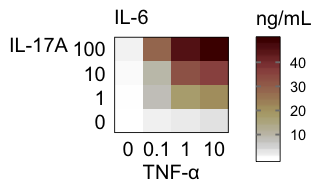

In [11]:
options(repr.plot.width = 2.75, repr.plot.height = 1.6)

scientific_10 <- function(x) {
  parse(text=gsub("e", " %*% 10^", scales::scientific_format()(x)))
}

d1 <- d_il6 %>%
group_by(TNF, IL17) %>%
summarize(ng_mL = mean(pg_ml) / 1000)

p1 <- ggplot(d1) +
aes(x = factor(TNF), y = factor(IL17), fill = ng_mL) +
geom_tile() +
scale_fill_scico(
  palette = "bilbao"
) +
scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0)) +
labs(title = "IL-6", x = "TNF-α", y = "IL-17A") +
theme_minimal() +
theme(legend.position = "right",
  panel.grid   = element_blank(),
  panel.border = element_rect(fill = NA, size = 0.5),
  axis.text    = element_text(color = "black", size  = 12),
  legend.title = element_text(size = 12),
  plot.title   = element_text(size = 12),
  axis.title   = element_text(size = 12),
  axis.title.y = element_text(angle = 0)
) +
guides(
  fill = guide_colorbar(
    barheight = 5.2,
    title = "ng/mL",
    barwidth = 1,
    ticks.linewidth = 1.5,
    ticks.colour = "grey50",
    frame.colour = "black",
    frame.linewidth = 0.7
  )
)

show_plot(p1, name = "synergy-IL6")

Writing notebooks/figures/synergy-MMP3.png
Writing notebooks/figures/synergy-MMP3.pdf


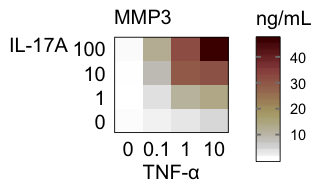

In [12]:
options(repr.plot.width = 2.75, repr.plot.height = 1.6)

scientific_10 <- function(x) {
  parse(text=gsub("e", " %*% 10^", scales::scientific_format()(x)))
}

d1 <- d_mmp3 %>%
group_by(TNF, IL17) %>%
summarize(ng_mL = mean(pg_ml) / 1000)

p1 <- ggplot(d1) +
aes(x = factor(TNF), y = factor(IL17), fill = ng_mL) +
geom_tile() +
scale_fill_scico(
  palette = "bilbao"
) +
scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0)) +
labs(title = "MMP3", x = "TNF-α", y = "IL-17A") +
theme_minimal() +
theme(legend.position = "right",
  panel.grid   = element_blank(),
  panel.border = element_rect(fill = NA, size = 0.5),
  axis.text    = element_text(color = "black", size  = 12),
  legend.title = element_text(size = 12),
  plot.title   = element_text(size = 12),
  axis.title   = element_text(size = 12),
  axis.title.y = element_text(angle = 0)
) +
guides(
  fill = guide_colorbar(
    barheight = 5.2,
    title = "ng/mL",
    barwidth = 1,
    ticks.linewidth = 1.5,
    ticks.colour = "grey50",
    frame.colour = "black",
    frame.linewidth = 0.7
  )
)

show_plot(p1, name = "synergy-MMP3")

In [8]:
d1

TNF,IL17,ng_mL
0.0,0,0.09952013
0.0,1,0.20352990
0.0,10,0.56321803
0.0,100,1.37488229
0.1,0,1.61699858
0.1,1,8.17092750
0.1,10,9.96162000
0.1,100,28.40539125
1.0,0,2.26138179
1.0,1,17.78103292


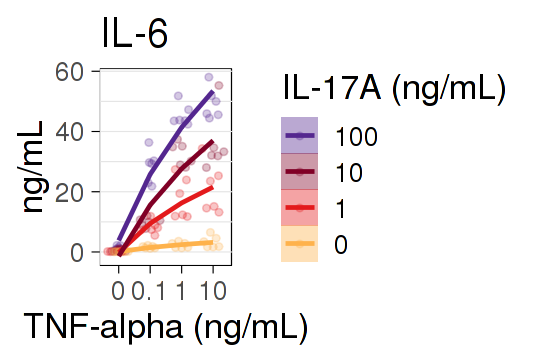

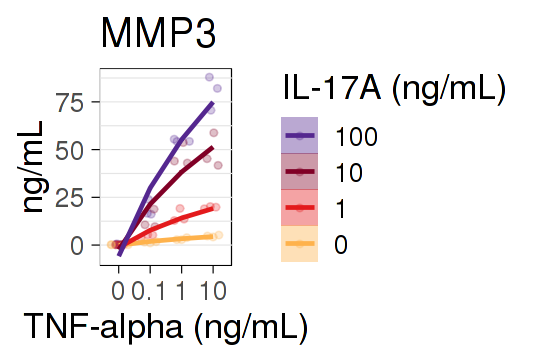

In [9]:

plot_d <- function(d, title = NULL) {
  ggplot(
    data = d,
    mapping = aes(
      x = as.factor(TNF),
      y = pg_ml,
      color = IL17_factor,
      fill = IL17_factor,
      group = IL17_factor
    )
  ) +
    scale_color_manual(values = il17_colors, labels = c(0, 1, 10, 100)) +
    scale_fill_manual(values = il17_colors, labels = c(0, 1, 10, 100)) +
    geom_quasirandom(alpha = 0.25) +
    stat_smooth(method = "lm", formula = y ~ log1p(x), level = NA) +
#     stat_smooth(
#       method = "loess", formula = y ~ log1p(x), level = 0.95, alpha = 0.15
#     ) +
    # scale_y_log10() +
    scale_y_continuous(labels = function(x) x / 1e3) +
    guides(
      color = guide_legend(reverse = TRUE, title = "IL-17A (ng/mL)"),
      fill = guide_legend(reverse = TRUE, title = "IL-17A (ng/mL)")
    ) +
    # facet_wrap(~ IL17_factor, ncol = 4) +
    theme_clean(base_size = 20) +
    theme(
      legend.key.size = unit(1.5, 'lines'),
      panel.grid.major.y = element_line(color = 'grey90', size = 0.25),
      panel.grid.minor.y = element_line(color = 'grey90', size = 0.25),
      strip.background = element_blank()
    ) +
    labs(y = "ng/mL", x = "TNF-alpha (ng/mL)", title = title)
}

                       
options(repr.plot.width = 4.5, repr.plot.height = 3)

plot_d(d_il6, "IL-6")
#ggsave("figures/ELISA_TNF_IL17_IL6.pdf", width = 6, height = 4)

plot_d(subset(d_mmp3, donor == "RA22"), "MMP3")
#ggsave("figures/ELISA_TNF_IL17_MMP3.pdf", width = 6, height = 4)


IL17_factor,y,x
0 ng/mL,95.59973,1
1 ng/mL,210.54390,2
10 ng/mL,483.61503,3
100 ng/mL,1241.21512,4


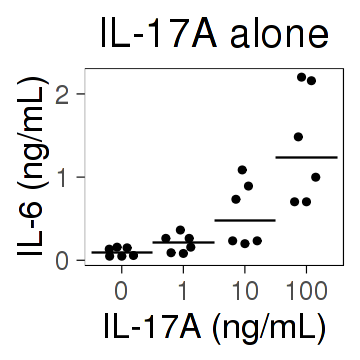

In [10]:
options(repr.plot.width = 3, repr.plot.height = 3)

d_il6_summary <- subset(d_il6, TNF == 0) %>% group_by(IL17_factor) %>% summarise(y = median(pg_ml))
d_il6_summary$x <- as.integer(d_il6_summary$IL17_factor)
d_il6_summary

p1 <- ggplot() +
scale_color_manual(values = il17_colors) +
scale_fill_manual(values = il17_colors) +
geom_quasirandom(
  data = subset(d_il6, TNF == 0),
  mapping = aes(
    x = stringr::str_split_fixed(IL17_factor, " ", 2)[,1],
    y = pg_ml
  )
) +
geom_segment(
  data    = d_il6_summary,
  mapping = aes(x = x - 0.5, xend = x + 0.5, y = y, yend = y),
  size    = 0.5
) +
scale_y_continuous(labels = function(x) x / 1e3, breaks = scales::pretty_breaks(2)) +
theme_clean(base_size = 20) +
theme(
  plot.title = element_text(hjust = 0.5),
  legend.position = "none"
) +
labs(x = "IL-17A (ng/mL)", y = "IL-6 (ng/mL)", title = "IL-17A alone")

p1

In [11]:
max((d_il6 %>% filter(TNF == 0))$pg_ml)

[1] 2201.525

TNF_factor,y,x
0,95.59973,1
0.1,1570.92350,2
1,2162.74237,3
10,2607.19650,4


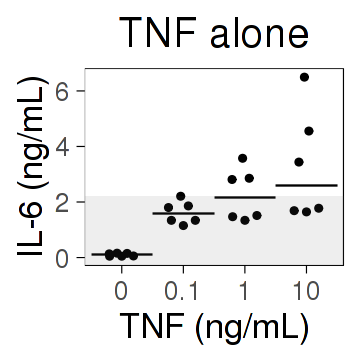

In [12]:
options(repr.plot.width = 3, repr.plot.height = 3)

d_il6$TNF_factor <- factor(d_il6$TNF)

d_il6_summary <- subset(d_il6, IL17_factor == "0 ng/mL") %>% group_by(TNF_factor) %>% summarise(y = median(pg_ml))
d_il6_summary$x <- as.integer(d_il6_summary$TNF_factor)
d_il6_summary

p2 <- ggplot() +
scale_color_manual(values = il17_colors) +
scale_fill_manual(values = il17_colors) +
geom_quasirandom(
  data = subset(d_il6, IL17_factor == "0 ng/mL"),
  mapping = aes(
    x = TNF_factor,
    y = pg_ml
  )
) +
geom_segment(
  data    = d_il6_summary,
  mapping = aes(x = x - 0.5, xend = x + 0.5, y = y, yend = y),
  size    = 0.5
) +
annotate(
  geom = "rect",
  xmin = -Inf, xmax = Inf,
  ymin = -Inf, ymax = max((d_il6 %>% filter(TNF == 0))$pg_ml),
  size = 0,
  color = "black", alpha = 0.1
) +
scale_y_continuous(labels = function(x) x / 1e3, breaks = scales::pretty_breaks(3)) +
theme_clean(base_size = 20) +
theme(
  plot.title = element_text(hjust = 0.5),
  legend.position = "none"
) +
labs(x = "TNF (ng/mL)", y = "IL-6 (ng/mL)", title = "TNF alone")

p2

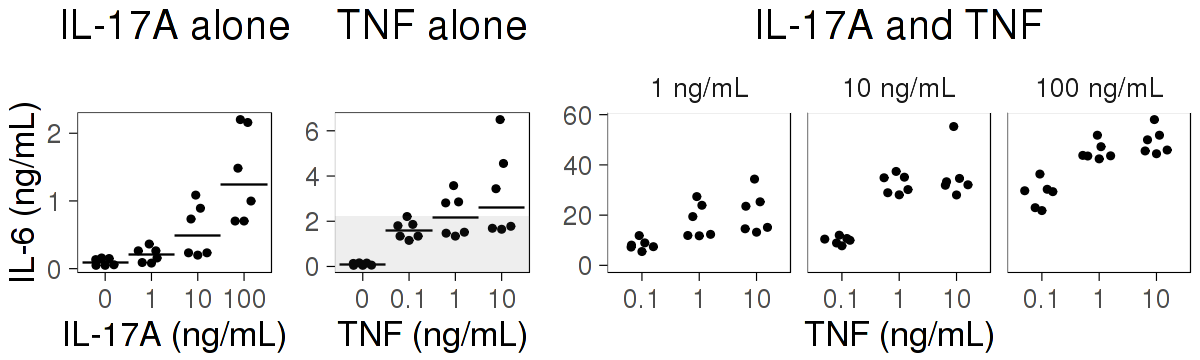

In [13]:
options(repr.plot.width = 10, repr.plot.height = 3)

#subset(d_il6, TNF > 0 & IL17_factor != "0 ng/mL")

p3 <- ggplot(
  data = subset(d_il6, TNF > 0 & IL17_factor != "0 ng/mL"),
  mapping = aes(
    x = as.factor(TNF),
    y = pg_ml
  )
) +
geom_quasirandom() +
scale_y_continuous(labels = function(x) x / 1e3, limits = c(0, NA)) +
stat_smooth(method = "lm", formula = y ~ log1p(x), level = NA) +
facet_wrap(~ IL17_factor, ncol = 4) +
theme_clean(base_size = 20) +
theme(
  plot.title = element_text(hjust = 0.5)
) +
labs(y = "IL-6 (ng/mL)", x = "TNF (ng/mL)", title = "IL-17A and TNF")
                   
(p1) +
(p2 + labs(y = NULL)) +
(p3 + labs(y = NULL)) + plot_layout(ncol = 3, widths = c(1, 1, 3))

IL17_factor,y,x
0 ng/mL,95.59973,1
1 ng/mL,210.54390,2
10 ng/mL,483.61503,3
100 ng/mL,1241.21512,4


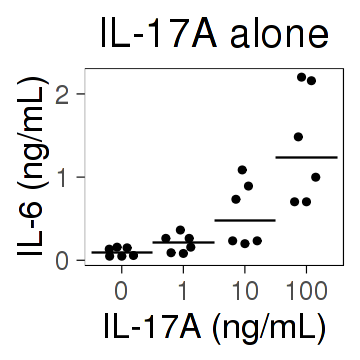

In [14]:
options(repr.plot.width = 3, repr.plot.height = 3)

d_il6_summary <- subset(d_il6, TNF == 0) %>% group_by(IL17_factor) %>% summarise(y = median(pg_ml))
d_il6_summary$x <- as.integer(d_il6_summary$IL17_factor)
d_il6_summary

p1 <- ggplot() +
scale_color_manual(values = il17_colors) +
scale_fill_manual(values = il17_colors) +
geom_quasirandom(
  data = subset(d_il6, TNF == 0),
  mapping = aes(
    x = stringr::str_split_fixed(IL17_factor, " ", 2)[,1],
    y = pg_ml
  )
) +
geom_segment(
  data    = d_il6_summary,
  mapping = aes(x = x - 0.5, xend = x + 0.5, y = y, yend = y),
  size    = 0.5
) +
scale_y_continuous(labels = function(x) x / 1e3, breaks = scales::pretty_breaks(2)) +
theme_clean(base_size = 20) +
theme(
  plot.title = element_text(hjust = 0.5),
  legend.position = "none"
) +
labs(x = "IL-17A (ng/mL)", y = "IL-6 (ng/mL)", title = "IL-17A alone")

p1